In [1]:
# import trax
# from trax import layers as tl
# import trax.fastmath.numpy as fastnp
# from trax.supervised import training
from functools import partial
import numpy as np
from itertools import combinations
import random as rnd
from random import sample
import json
import sklearn.metrics as metrics
from sklearn.metrics import classification_report , confusion_matrix, roc_auc_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import copy
import torch
import os
import warnings
from scipy.spatial import distance
from os import walk
from transformers import AutoTokenizer, AutoModel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#initialize codebert
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model_codebert = AutoModel.from_pretrained("microsoft/codebert-base").to(device)
np.random.seed(777)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from os import walk

from transformers import AutoModelForCausalLM
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [4]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [5]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Get the count of unique values in the 'projects' column
unique_projects_counts = data['project'].value_counts()

# Filter and display the projects with more than 300 counts
filtered_projects = unique_projects_counts[unique_projects_counts > 30]
print(filtered_projects)


project
dubbo                     170
hadoop                    146
nifi                      139
junit-quickcheck          131
ormlite-core              113
admiral                   109
wildfly                    84
Mapper                     75
fastjson                   64
typescript-generator       60
Chronicle-Wire             59
Java-WebSocket             54
biojava                    51
spring-boot                48
visualee                   47
hbase                      47
innodb-java-reader         45
adyen-java-api-library     45
spring-hateoas             41
hive                       41
DataflowTemplates          39
esper                      38
spring-data-r2dbc          37
openhtmltopdf              35
nacos                      32
Name: count, dtype: int64


In [6]:
label_to_int_pre= {
    'OD': 0,
    'NIO': 1,
    'ID': 2,
    'NDOD': 3,
    'NOD': 4,
    'UD':5
}
int_to_label_pre = {
    0: 'OD',
    1: 'NIO',
    2: 'ID',
    3: 'NDOD',
    4: 'NOD',
    5: 'UD',
}

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame that includes all the data
# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Specify the project name you want to include
project_name = "admiral"

# Assuming 'data' is your DataFrame that includes all the data
project_data = data[data['project'] == project_name]

# Extract the relevant fields: 'preprocessed_code' and 'category'
relevant_data = project_data[['preprocessed_code', 'category']]

# Filter the data to include only categories 1, 2, 3, and 4 (up to 5 if needed)
filtered_data = relevant_data[relevant_data['category'].isin([1, 3,4,5])]

# Split the data into training and validation sets, stratifying by 'category' to ensure all categories are represented
train_data, valid_data = train_test_split(filtered_data, test_size=0.2, random_state=42, stratify=filtered_data['category'])

# Mapping from integers to labels

# Replace category numbers with category labels
train_data['category'] = train_data['category'].map(int_to_label_pre)
valid_data['category'] = valid_data['category'].map(int_to_label_pre)

# Extract buggy code and categories for train and validation sets
train_buggy_code = train_data['preprocessed_code'].tolist()
valid_buggy_code = valid_data['preprocessed_code'].tolist()
train_categories = train_data['category'].tolist()
valid_categories = valid_data['category'].tolist()

# Print the splits for verification
print("Train buggy code:", len(train_buggy_code))
print("Validation buggy code:", len(valid_buggy_code))
print("Train categories:", len(train_categories))
print("Validation categories:", len(valid_categories))


Train buggy code: 85
Validation buggy code: 22
Train categories: 85
Validation categories: 22


In [8]:
print("Unique categories in training set:", set(train_categories))
print("Unique categories in validation set:", set(valid_categories))


Unique categories in training set: {'NOD', 'NDOD', 'UD', 'NIO'}
Unique categories in validation set: {'NOD', 'NDOD', 'UD', 'NIO'}


In [9]:
label_to_int= {
    'NIO': 0,
    'NDOD': 1,
    'NOD': 2,
    'UD':3
}

In [10]:
from torch.utils.data import Dataset
import numpy as np
import random
import torch

class SiameseDataset(Dataset):
    def __init__(self, train_buggy_code, valid_buggy_code, tokenizer, codebert, categories, split):
        self.train_buggy_code = train_buggy_code
        self.valid_buggy_code = valid_buggy_code
        self.tokenizer = tokenizer
        self.codebert = codebert.to(device)
        self.categories = categories
        self.split = split
        self.m_len = self.calculate_max_output_length()
        
        # Preprocess categories to map labels to indices
        self.label_to_indices = {}
        for index, category in enumerate(categories):
            if category not in self.label_to_indices:
                self.label_to_indices[category] = []
            self.label_to_indices[category].append(index)

        # For negative sampling
        self.labels = categories
        self.unique_labels = list(set(self.labels))
        
    def calculate_max_output_length(self):
        max_length = 0
        for code in self.train_buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length_train = length
        for code in self.valid_buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length_valid = length
        if max_length_train > max_length_valid:
            return max_length_train
        else:
            return max_length_valid

    def simulate_process_length(self, snippet):
        # Calculate how many segments would be needed
        encoded_input = self.tokenizer.encode(snippet, add_special_tokens=True)
        # Each segment processes up to 512 tokens (max length for BERT models)
        num_segments = (len(encoded_input) + 511) // 512  # 512 tokens per segment, including CLS and SEP
        return num_segments * 768
    def __len__(self):
        if self.split == 'train':
            return len(self.train_buggy_code)
        else:
            return len(self.valid_buggy_code)

    def __getitem__(self, idx):
        if self.split == 'train':
            # Anchor label
            anchor_label = self.categories[idx]

            # Positive sample
            positive_idx = idx
            while positive_idx == idx:  # Ensure different indices for anchor and positive
                positive_idx = random.choice(self.label_to_indices[anchor_label])

            # Negative sample
            negative_label = random.choice([lab for lab in self.unique_labels if lab != anchor_label])
            negative_idx = random.choice(self.label_to_indices[negative_label])

            anchor = self._process_snippet(self.train_buggy_code[idx])
            positive = self._process_snippet(self.train_buggy_code[positive_idx])
            negative = self._process_snippet(self.train_buggy_code[negative_idx])
            
            if len(anchor) <= 768:
                short_data = True
            else:
                short_data = False
                


            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'positive':torch.nn.functional.pad(positive, (0, self.m_len - positive.size(0))),
                'negative': torch.nn.functional.pad(negative, (0, self.m_len - negative.size(0))),
                'label': label_to_int[anchor_label],  # Optional, depends on how you want to use it
                'short_data_flag': short_data
            }
        elif self.split == 'val':
            anchor_label = self.categories[idx]
            anchor = self._process_snippet(self.valid_buggy_code[idx])
            
            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'label': label_to_int[anchor_label]  # Optional, depends on how you want to use it
            }

        
    def _process_snippet(self, snippet):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # Tokenize input without the max_length constraint
        inputs = self.tokenizer(snippet, return_tensors='pt').to(device)

        if inputs['input_ids'].shape[1] < 512:
            with torch.no_grad():
                outs = self.codebert(**inputs)
            cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
            return cls  # Move to CPU to save GPU memory
        else:
            total_length = inputs['input_ids'].shape[1]
            parts = []
            step_size = 100
            chunk_size = 512

            for start_index in range(0, total_length, step_size):
                end_index = min(start_index + chunk_size, total_length)
                input_segment = {key: val[:, start_index:end_index].to(device) for key, val in inputs.items()}

                with torch.no_grad():
                    output_segment = self.codebert(**input_segment)
                cls_segment = output_segment.last_hidden_state[:, 0, :].squeeze().detach()
                parts.append(cls_segment)  # Move to CPU

            concatenated_parts = torch.cat(parts, dim=0)
            return concatenated_parts

In [11]:
# Create instances of the custom dataset class
train_dataset = SiameseDataset(train_buggy_code, valid_buggy_code, tokenizer, model_codebert, train_categories, 'train')
val_dataset = SiameseDataset(train_buggy_code, valid_buggy_code, tokenizer, model_codebert, valid_categories, 'val')

# Create dataloaders for training and validation
batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Print the lengths of the dataloaders for verification
print("Train dataloader length:", len(train_dataloader))
print("Validation dataloader length:", len(val_dataloader))

Train dataloader length: 11
Validation dataloader length: 3


In [12]:
import numpy as np

def sample_triplet_data(data, sample_size_ratio):
    """
    Samples a subset of triplet data (anchor, positive, negative) while preserving class distribution.
    
    Parameters:
    - data: list of dictionaries, where each dictionary has keys 'anchor', 'positive', 'negative', 'label'.
    - sample_size_ratio: float, the fraction of the data to sample (0 < sample_size_ratio <= 1).
    
    Returns:
    - sampled_data: list of dictionaries, the sampled subset of the original data.
    """
    # Extract labels to understand the class distribution
    labels = [item['label'] for item in data]
    unique_classes = np.unique(labels)
    
    sampled_data = []
    
    for cls in unique_classes:
        # Find all items belonging to the current class
        class_items = [item for item in data if item['label'] == cls]
        # Calculate the number of items to sample from this class
        num_samples = int(np.ceil(len(class_items) * sample_size_ratio))
        # Randomly sample items without replacement
        sampled_items = np.random.choice(class_items, size=num_samples, replace=False)
        # Append the sampled items to the output list
        sampled_data.extend(sampled_items)
    
    # Optionally, shuffle the sampled dataset to mix classes
    np.random.shuffle(sampled_data)

    return sampled_data


In [13]:
import gc
from tqdm import tqdm
plot_data = []
plot_labels = []
short_data_flags = []
for item in tqdm(train_dataset):
    
    plot_data.append(item['anchor'])
    plot_labels.append(item['label'])
    short_data_flags.append(item['short_data_flag'])

 71%|███████   | 60/85 [00:00<00:00, 121.96it/s]

100%|██████████| 85/85 [00:00<00:00, 107.49it/s]


In [14]:
m_len = plot_data[0].shape[0]

In [15]:
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']  
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Create a custom colormap
cc = LinearSegmentedColormap.from_list("cc", colors, N=5)


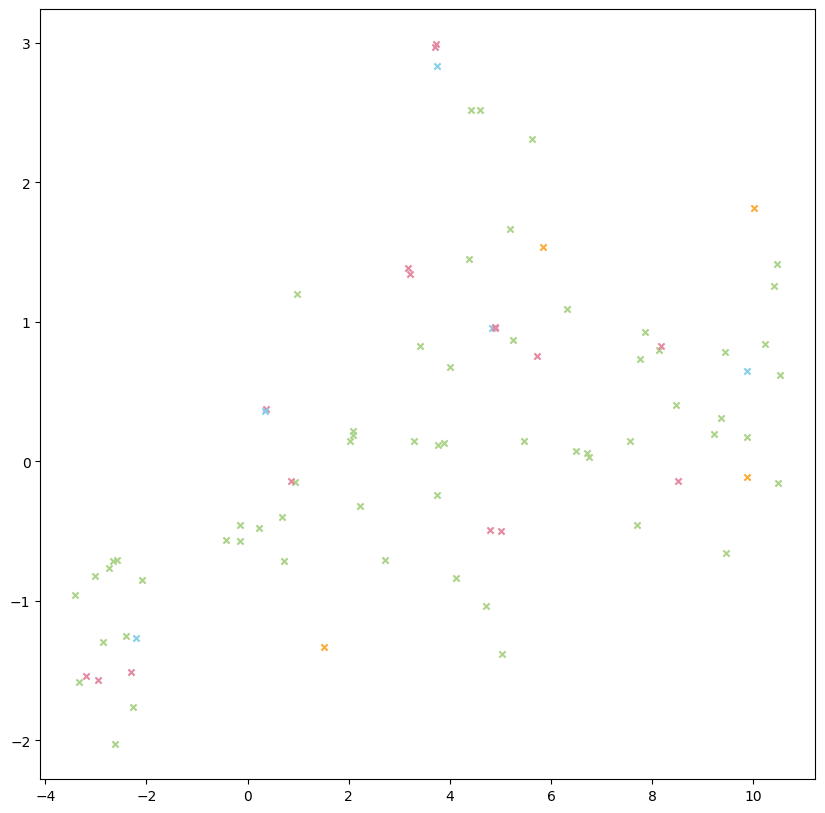

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
import numpy as np

# Assuming X, plot_data, and plot_labels are defined as before
# Also assuming bool_values is your list/array of boolean values

X = torch.stack(plot_data).cpu().numpy()

# Extract labels for each point
labelsNums = plot_labels

# Perform t-SNE dimensionality reduction
X_embedded = TSNE(n_components=2, init='random').fit_transform(X)

# Assuming 'cc' is a colormap, you might need to adjust this to fit your actual colormap variable
# Generate an array of colors for each label
unique_labels = np.unique(labelsNums)
colors = plt.cm.get_cmap(cc, len(unique_labels))  # Adjust 'cc' as needed to your colormap name
label_to_color = {label: colors(i / len(unique_labels)) for i, label in enumerate(unique_labels)}
colors_array = np.array([label_to_color[label] for label in labelsNums])

# Create the scatter plot
plt.figure(figsize=(10, 10))

# Iterate through each datapoint
for i in range(len(X_embedded)):
    marker = 'x' if short_data_flags[i] else 'o'  # Choose the marker based on the boolean value
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors_array[i], s=20, alpha=1, marker=marker)

# Set the background color to black
# plt.gca().set_facecolor('white')
# # Adjust the color of the ticks and labels for better visibility
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# plt.xlabel('Component 1', color='white')
# plt.ylabel('Component 2', color='white')

plt.show()


In [17]:
# Load the CodeBERT tokenizer (adjust the model_name as needed)
model_name = "microsoft/codebert-base"
codebert_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


class SiameseNetwork(nn.Module):
    def __init__(self, embedding_size):
        super(SiameseNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(embedding_size, int(embedding_size/2)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/2), int(embedding_size/4)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/4), embedding_size)
        )

    def forward(self, x):
        output = self.fc(x)
        return output

In [18]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_positive = (anchor - positive).pow(2).sum(1)
        distance_negative = (anchor - negative).pow(2).sum(1)
        losses = torch.relu(distance_positive - distance_negative + self.margin)
        return losses.mean()

In [19]:
learning_rate = 1e-5
num_epochs = 450
embed_size = m_len  # This should match the output size of CodeBERT
siamese_network = SiameseNetwork(embed_size).to(device)
criterion = TripletLoss(margin=1.0)
optimizer = optim.Adam(siamese_network.parameters(), lr=learning_rate)
triplet_loss = TripletLoss().to(device)

In [20]:
# from transformers import get_linear_schedule_with_warmup
# warmup_Frac = 0.1
# total_iter = num_epochs * len(train_dataloader)
# scheduler = get_linear_schedule_with_warmup(optimizer, int(warmup_Frac * total_iter), total_iter)

In [21]:
from tqdm import tqdm
best_loss = 100.0
num_epochs = 400
epoch_loss_list = []
model_name = "FlakyXbert_IDoFT_project_" + project_name + '_final.pth'
for epoch in range(num_epochs):
    total_loss = 0.0
    siamese_network.train()
    for batch in tqdm(train_dataloader):

        labels = (batch['label']).to(device)
        batch_anchor = (batch['anchor']).to(device)
        batch_positive = (batch['positive']).to(device)
        batch_negative = (batch['negative']).to(device)

        anchor_output = siamese_network(batch_anchor)
        positive_out = siamese_network(batch_positive)
        negative_out = siamese_network(batch_negative)

        loss = criterion(anchor_output, positive_out, negative_out)
        optimizer.zero_grad()
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(siamese_network.parameters(), max_norm=2.0)        
        optimizer.step()
        # scheduler.step()

        total_loss += loss.item()
        if total_loss <= best_loss:
            # print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
            print("Loss improved saving model")
            torch.save(siamese_network.state_dict(), model_name)
            best_loss = total_loss
        
            
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    # The line `epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")` is attempting to append a formatted string to a list named `epoch_loss_list`. This string contains information about the current epoch number, total number of epochs, and the average loss calculated for that epoch. However, in the provided code snippet, the `epoch_loss_list` list is not defined or used anywhere else in the code.
    epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    

 36%|███▋      | 4/11 [00:00<00:00, 15.62it/s]

Loss improved saving model


 91%|█████████ | 10/11 [00:00<00:00, 16.84it/s]

100%|██████████| 11/11 [00:00<00:00, 17.03it/s]


Epoch 1/400, Loss: 1.0013385252519087


100%|██████████| 11/11 [00:00<00:00, 18.28it/s]


Epoch 2/400, Loss: 1.0002421899275347


 18%|█▊        | 2/11 [00:00<00:00, 17.06it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.91it/s]


Epoch 3/400, Loss: 0.9675752412189137


100%|██████████| 11/11 [00:00<00:00, 18.49it/s]


Epoch 4/400, Loss: 0.9947871132330461


100%|██████████| 11/11 [00:00<00:00, 17.98it/s]


Epoch 5/400, Loss: 0.969004517251795


100%|██████████| 11/11 [00:00<00:00, 18.40it/s]


Epoch 6/400, Loss: 0.9963692751797762


 18%|█▊        | 2/11 [00:00<00:00, 16.82it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.11it/s]


Epoch 7/400, Loss: 1.0045950683680447


 18%|█▊        | 2/11 [00:00<00:00, 17.63it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.99it/s]


Epoch 8/400, Loss: 0.9607251449064775


100%|██████████| 11/11 [00:00<00:00, 18.13it/s]


Epoch 9/400, Loss: 0.9144139614972201


100%|██████████| 11/11 [00:00<00:00, 18.28it/s]


Epoch 10/400, Loss: 0.9412764039906588


100%|██████████| 11/11 [00:00<00:00, 18.08it/s]


Epoch 11/400, Loss: 0.9302948713302612


100%|██████████| 11/11 [00:00<00:00, 18.46it/s]


Epoch 12/400, Loss: 0.9349648410623724


 18%|█▊        | 2/11 [00:00<00:00, 16.79it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.07it/s]


Epoch 13/400, Loss: 0.9592758146199313


 18%|█▊        | 2/11 [00:00<00:00, 16.79it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.17it/s]


Epoch 14/400, Loss: 0.86677255413749


100%|██████████| 11/11 [00:00<00:00, 17.92it/s]


Epoch 15/400, Loss: 0.8924146348779852


100%|██████████| 11/11 [00:00<00:00, 18.58it/s]


Epoch 16/400, Loss: 0.9376737529581244


100%|██████████| 11/11 [00:00<00:00, 18.23it/s]


Epoch 17/400, Loss: 0.8867136998610063


100%|██████████| 11/11 [00:00<00:00, 18.26it/s]


Epoch 18/400, Loss: 0.9190539609302174


100%|██████████| 11/11 [00:00<00:00, 18.07it/s]


Epoch 19/400, Loss: 0.9692270647395741


100%|██████████| 11/11 [00:00<00:00, 18.04it/s]


Epoch 20/400, Loss: 0.827168117869984


100%|██████████| 11/11 [00:00<00:00, 18.06it/s]


Epoch 21/400, Loss: 0.8854262286966498


100%|██████████| 11/11 [00:00<00:00, 18.21it/s]


Epoch 22/400, Loss: 0.9076138897375627


100%|██████████| 11/11 [00:00<00:00, 18.61it/s]


Epoch 23/400, Loss: 0.9517562335187738


100%|██████████| 11/11 [00:00<00:00, 17.90it/s]


Epoch 24/400, Loss: 0.8039464300329034


100%|██████████| 11/11 [00:00<00:00, 18.25it/s]


Epoch 25/400, Loss: 0.8869816389950839


100%|██████████| 11/11 [00:00<00:00, 18.52it/s]


Epoch 26/400, Loss: 0.8412585041739724


100%|██████████| 11/11 [00:00<00:00, 18.08it/s]


Epoch 27/400, Loss: 0.8993185596032576


100%|██████████| 11/11 [00:00<00:00, 17.78it/s]


Epoch 28/400, Loss: 0.8588777834718878


100%|██████████| 11/11 [00:00<00:00, 17.98it/s]


Epoch 29/400, Loss: 0.8694158900867809


100%|██████████| 11/11 [00:00<00:00, 18.17it/s]


Epoch 30/400, Loss: 0.7941060824827715


100%|██████████| 11/11 [00:00<00:00, 18.20it/s]


Epoch 31/400, Loss: 0.9433025934479453


100%|██████████| 11/11 [00:00<00:00, 18.25it/s]


Epoch 32/400, Loss: 0.8576444820924238


100%|██████████| 11/11 [00:00<00:00, 18.43it/s]


Epoch 33/400, Loss: 0.8615772832523693


100%|██████████| 11/11 [00:00<00:00, 17.95it/s]


Epoch 34/400, Loss: 0.8545023636384443


100%|██████████| 11/11 [00:00<00:00, 18.50it/s]


Epoch 35/400, Loss: 0.8633240840651772


100%|██████████| 11/11 [00:00<00:00, 18.29it/s]


Epoch 36/400, Loss: 0.9149473309516907


100%|██████████| 11/11 [00:00<00:00, 18.21it/s]


Epoch 37/400, Loss: 0.8742919889363375


100%|██████████| 11/11 [00:00<00:00, 18.42it/s]


Epoch 38/400, Loss: 0.9081390500068665


100%|██████████| 11/11 [00:00<00:00, 18.30it/s]


Epoch 39/400, Loss: 0.8906092752109874


100%|██████████| 11/11 [00:00<00:00, 18.36it/s]


Epoch 40/400, Loss: 0.8295010978525336


 18%|█▊        | 2/11 [00:00<00:00, 17.65it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.77it/s]


Epoch 41/400, Loss: 0.7814414934678511


100%|██████████| 11/11 [00:00<00:00, 18.10it/s]


Epoch 42/400, Loss: 0.8422480875795538


100%|██████████| 11/11 [00:00<00:00, 18.08it/s]


Epoch 43/400, Loss: 0.7684032022953033


100%|██████████| 11/11 [00:00<00:00, 18.15it/s]


Epoch 44/400, Loss: 0.8128284215927124


100%|██████████| 11/11 [00:00<00:00, 18.06it/s]


Epoch 45/400, Loss: 0.7781263373114846


100%|██████████| 11/11 [00:00<00:00, 18.37it/s]


Epoch 46/400, Loss: 0.8048752329566262


100%|██████████| 11/11 [00:00<00:00, 18.28it/s]


Epoch 47/400, Loss: 0.8370141278613697


100%|██████████| 11/11 [00:00<00:00, 18.23it/s]


Epoch 48/400, Loss: 0.7489861141551625


100%|██████████| 11/11 [00:00<00:00, 18.36it/s]


Epoch 49/400, Loss: 0.7680771730162881


100%|██████████| 11/11 [00:00<00:00, 18.35it/s]


Epoch 50/400, Loss: 0.8144718896258961


100%|██████████| 11/11 [00:00<00:00, 17.84it/s]


Epoch 51/400, Loss: 0.7276458090001886


100%|██████████| 11/11 [00:00<00:00, 18.13it/s]


Epoch 52/400, Loss: 0.8110430945049633


100%|██████████| 11/11 [00:00<00:00, 18.19it/s]


Epoch 53/400, Loss: 0.6867121891541914


100%|██████████| 11/11 [00:00<00:00, 18.38it/s]


Epoch 54/400, Loss: 0.7065865560011431


 18%|█▊        | 2/11 [00:00<00:00, 16.55it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.92it/s]


Epoch 55/400, Loss: 0.736818405714902


100%|██████████| 11/11 [00:00<00:00, 18.06it/s]


Epoch 56/400, Loss: 0.6884790496392683


100%|██████████| 11/11 [00:00<00:00, 18.06it/s]


Epoch 57/400, Loss: 0.6739607886834578


100%|██████████| 11/11 [00:00<00:00, 17.95it/s]


Epoch 58/400, Loss: 0.7892654538154602


100%|██████████| 11/11 [00:00<00:00, 17.91it/s]


Epoch 59/400, Loss: 0.6324867660349066


100%|██████████| 11/11 [00:00<00:00, 18.21it/s]


Epoch 60/400, Loss: 0.7900241288271818


100%|██████████| 11/11 [00:00<00:00, 18.12it/s]


Epoch 61/400, Loss: 0.7259605581110175


100%|██████████| 11/11 [00:00<00:00, 18.23it/s]


Epoch 62/400, Loss: 0.6696389209140431


100%|██████████| 11/11 [00:00<00:00, 17.78it/s]


Epoch 63/400, Loss: 0.6224945946173235


100%|██████████| 11/11 [00:00<00:00, 18.18it/s]


Epoch 64/400, Loss: 0.6315681013193998


100%|██████████| 11/11 [00:00<00:00, 17.93it/s]


Epoch 65/400, Loss: 0.654052737084302


100%|██████████| 11/11 [00:00<00:00, 18.02it/s]


Epoch 66/400, Loss: 0.5701281049034812


100%|██████████| 11/11 [00:00<00:00, 17.87it/s]


Epoch 67/400, Loss: 0.6479391076348044


100%|██████████| 11/11 [00:00<00:00, 17.86it/s]


Epoch 68/400, Loss: 0.5450539317998019


100%|██████████| 11/11 [00:00<00:00, 17.73it/s]


Epoch 69/400, Loss: 0.666570701382377


100%|██████████| 11/11 [00:00<00:00, 17.87it/s]


Epoch 70/400, Loss: 0.5646440495144237


100%|██████████| 11/11 [00:00<00:00, 18.16it/s]


Epoch 71/400, Loss: 0.6058945818380876


100%|██████████| 11/11 [00:00<00:00, 17.93it/s]


Epoch 72/400, Loss: 0.6642105714841322


100%|██████████| 11/11 [00:00<00:00, 17.81it/s]


Epoch 73/400, Loss: 0.6035162183371457


100%|██████████| 11/11 [00:00<00:00, 18.51it/s]


Epoch 74/400, Loss: 0.5647627846761183


100%|██████████| 11/11 [00:00<00:00, 18.26it/s]


Epoch 75/400, Loss: 0.5455314246090975


100%|██████████| 11/11 [00:00<00:00, 18.35it/s]


Epoch 76/400, Loss: 0.5216767435724085


100%|██████████| 11/11 [00:00<00:00, 18.15it/s]


Epoch 77/400, Loss: 0.5233978534286673


100%|██████████| 11/11 [00:00<00:00, 18.37it/s]


Epoch 78/400, Loss: 0.5201783126050775


100%|██████████| 11/11 [00:00<00:00, 18.58it/s]


Epoch 79/400, Loss: 0.6431014483625238


100%|██████████| 11/11 [00:00<00:00, 17.85it/s]


Epoch 80/400, Loss: 0.5607631673867052


 18%|█▊        | 2/11 [00:00<00:00, 16.52it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.97it/s]


Epoch 81/400, Loss: 0.5384535735303705


100%|██████████| 11/11 [00:00<00:00, 17.92it/s]


Epoch 82/400, Loss: 0.44884748282757675


100%|██████████| 11/11 [00:00<00:00, 17.91it/s]


Epoch 83/400, Loss: 0.5059477537870407


100%|██████████| 11/11 [00:00<00:00, 18.02it/s]


Epoch 84/400, Loss: 0.5497011447494681


100%|██████████| 11/11 [00:00<00:00, 17.66it/s]


Epoch 85/400, Loss: 0.4099322110414505


100%|██████████| 11/11 [00:00<00:00, 17.99it/s]


Epoch 86/400, Loss: 0.5131599117409099


100%|██████████| 11/11 [00:00<00:00, 18.15it/s]


Epoch 87/400, Loss: 0.4976918372240933


 18%|█▊        | 2/11 [00:00<00:00, 16.24it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.70it/s]


Epoch 88/400, Loss: 0.4208208796652881


100%|██████████| 11/11 [00:00<00:00, 18.41it/s]


Epoch 89/400, Loss: 0.5062524351206693


100%|██████████| 11/11 [00:00<00:00, 18.16it/s]


Epoch 90/400, Loss: 0.5065634765408256


100%|██████████| 11/11 [00:00<00:00, 17.36it/s]


Epoch 91/400, Loss: 0.2982612122273581


100%|██████████| 11/11 [00:00<00:00, 18.19it/s]


Epoch 92/400, Loss: 0.4202563234350898


100%|██████████| 11/11 [00:00<00:00, 17.37it/s]


Epoch 93/400, Loss: 0.4094086614522067


100%|██████████| 11/11 [00:00<00:00, 18.32it/s]


Epoch 94/400, Loss: 0.4111958166415041


100%|██████████| 11/11 [00:00<00:00, 18.30it/s]


Epoch 95/400, Loss: 0.39144066924398596


100%|██████████| 11/11 [00:00<00:00, 18.37it/s]


Epoch 96/400, Loss: 0.5265305760231885


100%|██████████| 11/11 [00:00<00:00, 18.44it/s]


Epoch 97/400, Loss: 0.4669457023794001


100%|██████████| 11/11 [00:00<00:00, 17.52it/s]


Epoch 98/400, Loss: 0.33604139292782004


100%|██████████| 11/11 [00:00<00:00, 18.28it/s]


Epoch 99/400, Loss: 0.4045470221476121


 18%|█▊        | 2/11 [00:00<00:00, 17.23it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.12it/s]


Epoch 100/400, Loss: 0.3325955661183054


100%|██████████| 11/11 [00:00<00:00, 18.38it/s]


Epoch 101/400, Loss: 0.4629234603860162


 18%|█▊        | 2/11 [00:00<00:00, 16.48it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.20it/s]


Epoch 102/400, Loss: 0.37583353370428085


100%|██████████| 11/11 [00:00<00:00, 18.20it/s]


Epoch 103/400, Loss: 0.3947689167477868


100%|██████████| 11/11 [00:00<00:00, 18.37it/s]


Epoch 104/400, Loss: 0.46565703505819495


100%|██████████| 11/11 [00:00<00:00, 17.95it/s]


Epoch 105/400, Loss: 0.32746470448645676


100%|██████████| 11/11 [00:00<00:00, 17.04it/s]


Epoch 106/400, Loss: 0.32314040985974396


100%|██████████| 11/11 [00:00<00:00, 18.22it/s]


Epoch 107/400, Loss: 0.38317355649037793


100%|██████████| 11/11 [00:00<00:00, 18.19it/s]


Epoch 108/400, Loss: 0.32884062962098554


100%|██████████| 11/11 [00:00<00:00, 18.50it/s]


Epoch 109/400, Loss: 0.46407295898957684


100%|██████████| 11/11 [00:00<00:00, 18.38it/s]


Epoch 110/400, Loss: 0.3917069665410302


100%|██████████| 11/11 [00:00<00:00, 18.52it/s]


Epoch 111/400, Loss: 0.3964864435521039


 18%|█▊        | 2/11 [00:00<00:00, 17.43it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.11it/s]


Epoch 112/400, Loss: 0.29941764812577853


100%|██████████| 11/11 [00:00<00:00, 18.38it/s]


Epoch 113/400, Loss: 0.3649837997826663


100%|██████████| 11/11 [00:00<00:00, 18.27it/s]


Epoch 114/400, Loss: 0.43045555461536755


100%|██████████| 11/11 [00:00<00:00, 17.85it/s]


Epoch 115/400, Loss: 0.26002762940796936


100%|██████████| 11/11 [00:00<00:00, 18.31it/s]


Epoch 116/400, Loss: 0.4711749560453675


100%|██████████| 11/11 [00:00<00:00, 17.96it/s]


Epoch 117/400, Loss: 0.320893024856394


100%|██████████| 11/11 [00:00<00:00, 18.00it/s]


Epoch 118/400, Loss: 0.409842504019087


100%|██████████| 11/11 [00:00<00:00, 17.87it/s]


Epoch 119/400, Loss: 0.33959814601323823


100%|██████████| 11/11 [00:00<00:00, 17.61it/s]


Epoch 120/400, Loss: 0.23455591228875247


100%|██████████| 11/11 [00:00<00:00, 17.95it/s]


Epoch 121/400, Loss: 0.3031320510940118


100%|██████████| 11/11 [00:00<00:00, 18.12it/s]


Epoch 122/400, Loss: 0.3333386250517585


100%|██████████| 11/11 [00:00<00:00, 18.15it/s]


Epoch 123/400, Loss: 0.33555877987634053


100%|██████████| 11/11 [00:00<00:00, 17.99it/s]


Epoch 124/400, Loss: 0.329616669904102


100%|██████████| 11/11 [00:00<00:00, 18.08it/s]


Epoch 125/400, Loss: 0.3465394059365446


100%|██████████| 11/11 [00:00<00:00, 18.15it/s]


Epoch 126/400, Loss: 0.3508487804369493


100%|██████████| 11/11 [00:00<00:00, 18.35it/s]


Epoch 127/400, Loss: 0.3179320042783564


 18%|█▊        | 2/11 [00:00<00:00, 17.50it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.28it/s]


Epoch 128/400, Loss: 0.2839175056327473


100%|██████████| 11/11 [00:00<00:00, 18.11it/s]


Epoch 129/400, Loss: 0.3271722597154704


 18%|█▊        | 2/11 [00:00<00:00, 17.10it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.80it/s]


Epoch 130/400, Loss: 0.2503545324910771


100%|██████████| 11/11 [00:00<00:00, 17.36it/s]


Epoch 131/400, Loss: 0.18768017468127338


100%|██████████| 11/11 [00:00<00:00, 17.48it/s]


Epoch 132/400, Loss: 0.2993356060575355


100%|██████████| 11/11 [00:00<00:00, 18.31it/s]


Epoch 133/400, Loss: 0.2613371800292622


100%|██████████| 11/11 [00:00<00:00, 18.28it/s]


Epoch 134/400, Loss: 0.35906938124786725


100%|██████████| 11/11 [00:00<00:00, 18.12it/s]


Epoch 135/400, Loss: 0.30504562028429727


100%|██████████| 11/11 [00:00<00:00, 17.44it/s]


Epoch 136/400, Loss: 0.2988025044853037


100%|██████████| 11/11 [00:00<00:00, 18.33it/s]


Epoch 137/400, Loss: 0.3159311671148647


100%|██████████| 11/11 [00:00<00:00, 18.01it/s]


Epoch 138/400, Loss: 0.3311483033678748


100%|██████████| 11/11 [00:00<00:00, 18.13it/s]


Epoch 139/400, Loss: 0.32487988471984863


100%|██████████| 11/11 [00:00<00:00, 17.99it/s]


Epoch 140/400, Loss: 0.27127078446474945


100%|██████████| 11/11 [00:00<00:00, 17.82it/s]


Epoch 141/400, Loss: 0.29978455196727405


100%|██████████| 11/11 [00:00<00:00, 18.07it/s]


Epoch 142/400, Loss: 0.3617999242110686


 18%|█▊        | 2/11 [00:00<00:00, 16.94it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.95it/s]


Epoch 143/400, Loss: 0.14720931920138272


100%|██████████| 11/11 [00:00<00:00, 17.80it/s]


Epoch 144/400, Loss: 0.14108684726736762


100%|██████████| 11/11 [00:00<00:00, 16.48it/s]


Epoch 145/400, Loss: 0.272796093062921


100%|██████████| 11/11 [00:00<00:00, 17.94it/s]


Epoch 146/400, Loss: 0.29719588363712485


 18%|█▊        | 2/11 [00:00<00:00, 16.86it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.88it/s]


Epoch 147/400, Loss: 0.29459181834350934


100%|██████████| 11/11 [00:00<00:00, 17.26it/s]


Epoch 148/400, Loss: 0.2719647633758458


100%|██████████| 11/11 [00:00<00:00, 13.94it/s]


Epoch 149/400, Loss: 0.27283052084120835


100%|██████████| 11/11 [00:00<00:00, 16.90it/s]


Epoch 150/400, Loss: 0.2785788781263612


100%|██████████| 11/11 [00:00<00:00, 12.87it/s]


Epoch 151/400, Loss: 0.23221723464402286


100%|██████████| 11/11 [00:00<00:00, 12.04it/s]


Epoch 152/400, Loss: 0.30229288881475275


100%|██████████| 11/11 [00:00<00:00, 11.99it/s]


Epoch 153/400, Loss: 0.1736185679381544


100%|██████████| 11/11 [00:00<00:00, 11.96it/s]


Epoch 154/400, Loss: 0.2386169663884423


 18%|█▊        | 2/11 [00:00<00:00, 11.59it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.64it/s]


Epoch 155/400, Loss: 0.2020963845266537


100%|██████████| 11/11 [00:00<00:00, 11.89it/s]


Epoch 156/400, Loss: 0.18749455362558365


100%|██████████| 11/11 [00:00<00:00, 11.88it/s]


Epoch 157/400, Loss: 0.28841121156107297


100%|██████████| 11/11 [00:00<00:00, 11.53it/s]


Epoch 158/400, Loss: 0.35076128217307007


100%|██████████| 11/11 [00:00<00:00, 12.02it/s]


Epoch 159/400, Loss: 0.1503050225702199


 18%|█▊        | 2/11 [00:00<00:00, 10.26it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.62it/s]


Epoch 160/400, Loss: 0.3179019262844866


 18%|█▊        | 2/11 [00:00<00:00, 11.22it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.77it/s]


Epoch 161/400, Loss: 0.26523919945413416


100%|██████████| 11/11 [00:00<00:00, 11.96it/s]


Epoch 162/400, Loss: 0.2627719911662015


100%|██████████| 11/11 [00:00<00:00, 11.95it/s]


Epoch 163/400, Loss: 0.25124624506993726


100%|██████████| 11/11 [00:00<00:00, 11.73it/s]


Epoch 164/400, Loss: 0.22737357020378113


100%|██████████| 11/11 [00:00<00:00, 11.95it/s]


Epoch 165/400, Loss: 0.2864228595386852


100%|██████████| 11/11 [00:00<00:00, 11.93it/s]


Epoch 166/400, Loss: 0.34410482323305175


100%|██████████| 11/11 [00:00<00:00, 11.91it/s]


Epoch 167/400, Loss: 0.25769698416644876


100%|██████████| 11/11 [00:00<00:00, 11.91it/s]


Epoch 168/400, Loss: 0.2221825353123925


100%|██████████| 11/11 [00:00<00:00, 11.56it/s]


Epoch 169/400, Loss: 0.19203463061289353


100%|██████████| 11/11 [00:00<00:00, 11.74it/s]


Epoch 170/400, Loss: 0.22485726394436575


100%|██████████| 11/11 [00:00<00:00, 11.77it/s]


Epoch 171/400, Loss: 0.23932918906211853


100%|██████████| 11/11 [00:00<00:00, 11.75it/s]


Epoch 172/400, Loss: 0.3406946930018338


100%|██████████| 11/11 [00:00<00:00, 12.01it/s]


Epoch 173/400, Loss: 0.2294408299706199


100%|██████████| 11/11 [00:00<00:00, 11.85it/s]


Epoch 174/400, Loss: 0.17108914425427263


100%|██████████| 11/11 [00:00<00:00, 11.49it/s]


Epoch 175/400, Loss: 0.2188986214724454


100%|██████████| 11/11 [00:00<00:00, 11.75it/s]


Epoch 176/400, Loss: 0.22441417927091772


100%|██████████| 11/11 [00:00<00:00, 12.12it/s]


Epoch 177/400, Loss: 0.2142209383574399


100%|██████████| 11/11 [00:00<00:00, 12.02it/s]


Epoch 178/400, Loss: 0.2539118291302161


100%|██████████| 11/11 [00:00<00:00, 11.89it/s]


Epoch 179/400, Loss: 0.25966027717698703


100%|██████████| 11/11 [00:00<00:00, 11.64it/s]


Epoch 180/400, Loss: 0.23791809650984677


100%|██████████| 11/11 [00:00<00:00, 11.81it/s]


Epoch 181/400, Loss: 0.22298527441241525


100%|██████████| 11/11 [00:00<00:00, 11.73it/s]


Epoch 182/400, Loss: 0.20866131240671332


100%|██████████| 11/11 [00:00<00:00, 11.61it/s]


Epoch 183/400, Loss: 0.15230406482111325


100%|██████████| 11/11 [00:00<00:00, 11.75it/s]


Epoch 184/400, Loss: 0.19502025097608566


100%|██████████| 11/11 [00:00<00:00, 11.82it/s]


Epoch 185/400, Loss: 0.24733158404176886


100%|██████████| 11/11 [00:00<00:00, 11.54it/s]


Epoch 186/400, Loss: 0.19913433356718582


100%|██████████| 11/11 [00:00<00:00, 11.89it/s]


Epoch 187/400, Loss: 0.17402878471396185


 18%|█▊        | 2/11 [00:00<00:00, 10.80it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.57it/s]


Epoch 188/400, Loss: 0.21998919952999463


100%|██████████| 11/11 [00:00<00:00, 11.73it/s]


Epoch 189/400, Loss: 0.22423807734792883


100%|██████████| 11/11 [00:00<00:00, 11.53it/s]


Epoch 190/400, Loss: 0.2024307968941602


100%|██████████| 11/11 [00:00<00:00, 11.94it/s]


Epoch 191/400, Loss: 0.1523649035529657


100%|██████████| 11/11 [00:00<00:00, 11.77it/s]


Epoch 192/400, Loss: 0.25258165326985443


100%|██████████| 11/11 [00:00<00:00, 11.94it/s]


Epoch 193/400, Loss: 0.19116953963583166


100%|██████████| 11/11 [00:00<00:00, 11.87it/s]


Epoch 194/400, Loss: 0.24323223734443838


 18%|█▊        | 2/11 [00:00<00:00, 11.44it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 12.12it/s]


Epoch 195/400, Loss: 0.23215524716810745


100%|██████████| 11/11 [00:00<00:00, 11.75it/s]


Epoch 196/400, Loss: 0.16549428891051898


100%|██████████| 11/11 [00:00<00:00, 11.86it/s]


Epoch 197/400, Loss: 0.21224196593869815


100%|██████████| 11/11 [00:00<00:00, 11.99it/s]


Epoch 198/400, Loss: 0.16738741692494263


100%|██████████| 11/11 [00:00<00:00, 11.83it/s]


Epoch 199/400, Loss: 0.22384127297184683


100%|██████████| 11/11 [00:00<00:00, 11.89it/s]


Epoch 200/400, Loss: 0.11595784263177351


100%|██████████| 11/11 [00:00<00:00, 11.89it/s]


Epoch 201/400, Loss: 0.1254983808506619


100%|██████████| 11/11 [00:00<00:00, 11.77it/s]


Epoch 202/400, Loss: 0.16648182747038928


100%|██████████| 11/11 [00:00<00:00, 11.85it/s]


Epoch 203/400, Loss: 0.2007006975737485


100%|██████████| 11/11 [00:00<00:00, 12.09it/s]


Epoch 204/400, Loss: 0.14822498031637885


 18%|█▊        | 2/11 [00:00<00:00, 11.66it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.94it/s]


Epoch 205/400, Loss: 0.20071432604031128


100%|██████████| 11/11 [00:00<00:00, 12.02it/s]


Epoch 206/400, Loss: 0.19373932548544623


100%|██████████| 11/11 [00:00<00:00, 11.78it/s]


Epoch 207/400, Loss: 0.24411137063394894


100%|██████████| 11/11 [00:00<00:00, 11.85it/s]


Epoch 208/400, Loss: 0.13242177665233612


 18%|█▊        | 2/11 [00:00<00:00, 11.33it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.84it/s]


Epoch 209/400, Loss: 0.14360231296582657


100%|██████████| 11/11 [00:00<00:00, 11.88it/s]


Epoch 210/400, Loss: 0.14072727886113254


100%|██████████| 11/11 [00:00<00:00, 11.97it/s]


Epoch 211/400, Loss: 0.25315912609750574


100%|██████████| 11/11 [00:00<00:00, 11.96it/s]


Epoch 212/400, Loss: 0.18694001774896274


 18%|█▊        | 2/11 [00:00<00:00, 11.12it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.73it/s]


Epoch 213/400, Loss: 0.19804347509687598


100%|██████████| 11/11 [00:00<00:00, 11.87it/s]


Epoch 214/400, Loss: 0.2197367880832065


 18%|█▊        | 2/11 [00:00<00:00, 11.26it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.71it/s]


Epoch 215/400, Loss: 0.07312308590520512


100%|██████████| 11/11 [00:00<00:00, 11.75it/s]


Epoch 216/400, Loss: 0.16619258306243204


100%|██████████| 11/11 [00:00<00:00, 11.80it/s]


Epoch 217/400, Loss: 0.16224553503773428


100%|██████████| 11/11 [00:00<00:00, 11.69it/s]


Epoch 218/400, Loss: 0.1135930053212426


100%|██████████| 11/11 [00:00<00:00, 11.82it/s]


Epoch 219/400, Loss: 0.11304705928672444


100%|██████████| 11/11 [00:00<00:00, 11.70it/s]


Epoch 220/400, Loss: 0.15719833021814172


 18%|█▊        | 2/11 [00:00<00:00, 11.57it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 12.00it/s]


Epoch 221/400, Loss: 0.13507312536239624


100%|██████████| 11/11 [00:00<00:00, 11.72it/s]


Epoch 222/400, Loss: 0.1625562682747841


100%|██████████| 11/11 [00:00<00:00, 11.95it/s]


Epoch 223/400, Loss: 0.16408889689906078


100%|██████████| 11/11 [00:00<00:00, 12.09it/s]


Epoch 224/400, Loss: 0.19288773902437903


100%|██████████| 11/11 [00:00<00:00, 11.80it/s]


Epoch 225/400, Loss: 0.08668385323306377


100%|██████████| 11/11 [00:00<00:00, 12.02it/s]


Epoch 226/400, Loss: 0.1883084001866254


 18%|█▊        | 2/11 [00:00<00:00, 11.65it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 12.08it/s]


Epoch 227/400, Loss: 0.18345760689540344


100%|██████████| 11/11 [00:00<00:00, 11.71it/s]


Epoch 228/400, Loss: 0.14888295328075235


100%|██████████| 11/11 [00:00<00:00, 11.84it/s]


Epoch 229/400, Loss: 0.17536032064394516


100%|██████████| 11/11 [00:00<00:00, 12.01it/s]


Epoch 230/400, Loss: 0.17968257448889993


100%|██████████| 11/11 [00:00<00:00, 11.75it/s]


Epoch 231/400, Loss: 0.08393812044100328


100%|██████████| 11/11 [00:00<00:00, 11.86it/s]


Epoch 232/400, Loss: 0.14337838170203296


100%|██████████| 11/11 [00:00<00:00, 11.99it/s]


Epoch 233/400, Loss: 0.2056133340705525


100%|██████████| 11/11 [00:00<00:00, 11.66it/s]


Epoch 234/400, Loss: 0.16626507653431458


 18%|█▊        | 2/11 [00:00<00:00, 11.64it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.85it/s]


Epoch 235/400, Loss: 0.10746039924296466


100%|██████████| 11/11 [00:00<00:00, 11.71it/s]


Epoch 236/400, Loss: 0.13209460404786197


100%|██████████| 11/11 [00:00<00:00, 11.66it/s]


Epoch 237/400, Loss: 0.09914303164590489


 18%|█▊        | 2/11 [00:00<00:00, 10.81it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.62it/s]


Epoch 238/400, Loss: 0.14141136678782376


100%|██████████| 11/11 [00:00<00:00, 11.74it/s]


Epoch 239/400, Loss: 0.12651707502928647


100%|██████████| 11/11 [00:00<00:00, 11.88it/s]


Epoch 240/400, Loss: 0.05763949386098168


100%|██████████| 11/11 [00:00<00:00, 11.90it/s]


Epoch 241/400, Loss: 0.15089909529144113


100%|██████████| 11/11 [00:00<00:00, 11.52it/s]


Epoch 242/400, Loss: 0.16132329878481952


100%|██████████| 11/11 [00:00<00:00, 11.68it/s]


Epoch 243/400, Loss: 0.14918726140802557


100%|██████████| 11/11 [00:00<00:00, 11.75it/s]


Epoch 244/400, Loss: 0.13825395025990225


100%|██████████| 11/11 [00:00<00:00, 11.74it/s]


Epoch 245/400, Loss: 0.17750211195512253


100%|██████████| 11/11 [00:00<00:00, 11.75it/s]


Epoch 246/400, Loss: 0.13395975665612656


100%|██████████| 11/11 [00:00<00:00, 12.22it/s]


Epoch 247/400, Loss: 0.15459627861326392


100%|██████████| 11/11 [00:00<00:00, 11.67it/s]


Epoch 248/400, Loss: 0.1329673257741061


 18%|█▊        | 2/11 [00:00<00:00, 11.08it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.80it/s]


Epoch 249/400, Loss: 0.16864413700320505


100%|██████████| 11/11 [00:00<00:00, 11.89it/s]


Epoch 250/400, Loss: 0.11662379719994286


100%|██████████| 11/11 [00:00<00:00, 11.90it/s]


Epoch 251/400, Loss: 0.10000719130039215


 18%|█▊        | 2/11 [00:00<00:00, 11.34it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.85it/s]


Epoch 252/400, Loss: 0.08693574639883908


100%|██████████| 11/11 [00:00<00:00, 11.81it/s]


Epoch 253/400, Loss: 0.11342299526387994


100%|██████████| 11/11 [00:00<00:00, 11.92it/s]


Epoch 254/400, Loss: 0.10865988379175012


 18%|█▊        | 2/11 [00:00<00:00, 11.90it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 12.04it/s]


Epoch 255/400, Loss: 0.06791888990185478


100%|██████████| 11/11 [00:00<00:00, 12.04it/s]


Epoch 256/400, Loss: 0.10421820120377974


100%|██████████| 11/11 [00:00<00:00, 11.64it/s]


Epoch 257/400, Loss: 0.1992116943001747


100%|██████████| 11/11 [00:00<00:00, 11.80it/s]


Epoch 258/400, Loss: 0.15231622620062393


100%|██████████| 11/11 [00:00<00:00, 12.06it/s]


Epoch 259/400, Loss: 0.07840978354215622


100%|██████████| 11/11 [00:00<00:00, 11.58it/s]


Epoch 260/400, Loss: 0.11032289198853752


100%|██████████| 11/11 [00:00<00:00, 11.66it/s]


Epoch 261/400, Loss: 0.13935328816825693


100%|██████████| 11/11 [00:00<00:00, 11.93it/s]


Epoch 262/400, Loss: 0.1505769206718965


100%|██████████| 11/11 [00:00<00:00, 11.35it/s]


Epoch 263/400, Loss: 0.14801874960010702


100%|██████████| 11/11 [00:00<00:00, 12.10it/s]


Epoch 264/400, Loss: 0.13511369851502505


 18%|█▊        | 2/11 [00:00<00:00, 10.90it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.38it/s]


Epoch 265/400, Loss: 0.09828549234027212


100%|██████████| 11/11 [00:00<00:00, 11.72it/s]


Epoch 266/400, Loss: 0.15611024404113943


100%|██████████| 11/11 [00:00<00:00, 11.94it/s]


Epoch 267/400, Loss: 0.1366999467665499


100%|██████████| 11/11 [00:00<00:00, 11.75it/s]


Epoch 268/400, Loss: 0.09602849591862071


100%|██████████| 11/11 [00:00<00:00, 11.48it/s]


Epoch 269/400, Loss: 0.06413376060399142


100%|██████████| 11/11 [00:00<00:00, 11.87it/s]


Epoch 270/400, Loss: 0.10300318083979866


100%|██████████| 11/11 [00:00<00:00, 11.89it/s]


Epoch 271/400, Loss: 0.0596954534676942


100%|██████████| 11/11 [00:00<00:00, 12.07it/s]


Epoch 272/400, Loss: 0.12845283611254257


100%|██████████| 11/11 [00:00<00:00, 11.60it/s]


Epoch 273/400, Loss: 0.1573490412397818


100%|██████████| 11/11 [00:00<00:00, 11.68it/s]


Epoch 274/400, Loss: 0.14097142395753923


100%|██████████| 11/11 [00:00<00:00, 11.56it/s]


Epoch 275/400, Loss: 0.14753615449775348


100%|██████████| 11/11 [00:00<00:00, 11.71it/s]


Epoch 276/400, Loss: 0.088041406463493


100%|██████████| 11/11 [00:00<00:00, 11.58it/s]


Epoch 277/400, Loss: 0.11189465631138194


100%|██████████| 11/11 [00:00<00:00, 11.83it/s]


Epoch 278/400, Loss: 0.1069784543730996


100%|██████████| 11/11 [00:00<00:00, 11.77it/s]


Epoch 279/400, Loss: 0.12856293063272128


100%|██████████| 11/11 [00:00<00:00, 11.68it/s]


Epoch 280/400, Loss: 0.07965439490296623


100%|██████████| 11/11 [00:00<00:00, 11.85it/s]


Epoch 281/400, Loss: 0.1030125313184478


100%|██████████| 11/11 [00:00<00:00, 11.41it/s]


Epoch 282/400, Loss: 0.09054796397686005


100%|██████████| 11/11 [00:00<00:00, 11.87it/s]


Epoch 283/400, Loss: 0.1412407085299492


100%|██████████| 11/11 [00:00<00:00, 11.90it/s]


Epoch 284/400, Loss: 0.07302872904322365


100%|██████████| 11/11 [00:00<00:00, 11.77it/s]


Epoch 285/400, Loss: 0.10372362759980289


100%|██████████| 11/11 [00:00<00:00, 11.55it/s]


Epoch 286/400, Loss: 0.11699481579390439


  0%|          | 0/11 [00:00<?, ?it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.57it/s]


Epoch 287/400, Loss: 0.1149084974418987


 18%|█▊        | 2/11 [00:00<00:00, 11.24it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.71it/s]


Epoch 288/400, Loss: 0.11568397689949382


 18%|█▊        | 2/11 [00:00<00:00, 11.37it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 12.15it/s]


Epoch 289/400, Loss: 0.0910454737869176


100%|██████████| 11/11 [00:00<00:00, 11.73it/s]


Epoch 290/400, Loss: 0.09614651108329947


100%|██████████| 11/11 [00:00<00:00, 11.95it/s]


Epoch 291/400, Loss: 0.14208086309107867


100%|██████████| 11/11 [00:00<00:00, 11.80it/s]


Epoch 292/400, Loss: 0.1023273386738517


100%|██████████| 11/11 [00:00<00:00, 11.95it/s]


Epoch 293/400, Loss: 0.126932446252216


  9%|▉         | 1/11 [00:00<00:01,  9.81it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.54it/s]


Epoch 294/400, Loss: 0.12170788984407079


100%|██████████| 11/11 [00:00<00:00, 11.73it/s]


Epoch 295/400, Loss: 0.11947044323791157


 18%|█▊        | 2/11 [00:00<00:00, 10.67it/s]

Loss improved saving model
Loss improved saving model
Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.76it/s]


Epoch 296/400, Loss: 0.0728003436868841


100%|██████████| 11/11 [00:00<00:00, 11.68it/s]


Epoch 297/400, Loss: 0.1320240172472867


100%|██████████| 11/11 [00:00<00:00, 11.78it/s]


Epoch 298/400, Loss: 0.09711331366138025


100%|██████████| 11/11 [00:00<00:00, 11.70it/s]


Epoch 299/400, Loss: 0.09161301499063318


100%|██████████| 11/11 [00:00<00:00, 11.45it/s]


Epoch 300/400, Loss: 0.08466809784824197


100%|██████████| 11/11 [00:00<00:00, 11.95it/s]


Epoch 301/400, Loss: 0.09739789231257005


 18%|█▊        | 2/11 [00:00<00:00, 11.42it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.70it/s]


Epoch 302/400, Loss: 0.08366033841263164


100%|██████████| 11/11 [00:00<00:00, 12.03it/s]


Epoch 303/400, Loss: 0.07595008273016322


 18%|█▊        | 2/11 [00:00<00:00, 10.82it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.64it/s]


Epoch 304/400, Loss: 0.09721749411387877


100%|██████████| 11/11 [00:00<00:00, 11.77it/s]


Epoch 305/400, Loss: 0.07807669043540955


100%|██████████| 11/11 [00:00<00:00, 11.82it/s]


Epoch 306/400, Loss: 0.09410912814465436


100%|██████████| 11/11 [00:00<00:00, 11.72it/s]


Epoch 307/400, Loss: 0.07498236745595932


 18%|█▊        | 2/11 [00:00<00:00, 11.13it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.83it/s]


Epoch 308/400, Loss: 0.12291147424416109


100%|██████████| 11/11 [00:00<00:00, 11.91it/s]


Epoch 309/400, Loss: 0.07668977366252379


  9%|▉         | 1/11 [00:00<00:01,  9.66it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.60it/s]


Epoch 310/400, Loss: 0.10264360769228502


100%|██████████| 11/11 [00:00<00:00, 12.00it/s]


Epoch 311/400, Loss: 0.1356023597446355


100%|██████████| 11/11 [00:00<00:00, 11.90it/s]


Epoch 312/400, Loss: 0.0670707415450703


100%|██████████| 11/11 [00:00<00:00, 11.50it/s]


Epoch 313/400, Loss: 0.11262010444294322


 18%|█▊        | 2/11 [00:00<00:00, 11.09it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.96it/s]


Epoch 314/400, Loss: 0.024066842161118984


100%|██████████| 11/11 [00:00<00:00, 12.11it/s]


Epoch 315/400, Loss: 0.08150605247779326


100%|██████████| 11/11 [00:00<00:00, 11.64it/s]


Epoch 316/400, Loss: 0.1324505013498393


 18%|█▊        | 2/11 [00:00<00:00, 10.38it/s]

Loss improved saving model
Loss improved saving model


 36%|███▋      | 4/11 [00:00<00:00, 10.37it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.47it/s]


Epoch 317/400, Loss: 0.05281206355853514


100%|██████████| 11/11 [00:00<00:00, 12.07it/s]


Epoch 318/400, Loss: 0.10316837443546815


100%|██████████| 11/11 [00:00<00:00, 11.78it/s]


Epoch 319/400, Loss: 0.1171457137573849


100%|██████████| 11/11 [00:00<00:00, 11.85it/s]


Epoch 320/400, Loss: 0.08134621449492195


100%|██████████| 11/11 [00:00<00:00, 11.81it/s]


Epoch 321/400, Loss: 0.05832333049990914


100%|██████████| 11/11 [00:00<00:00, 12.09it/s]


Epoch 322/400, Loss: 0.0759705975651741


 18%|█▊        | 2/11 [00:00<00:00, 11.27it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.64it/s]


Epoch 323/400, Loss: 0.0955938845872879


 18%|█▊        | 2/11 [00:00<00:00, 11.20it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.76it/s]


Epoch 324/400, Loss: 0.09081435203552246


100%|██████████| 11/11 [00:00<00:00, 12.16it/s]


Epoch 325/400, Loss: 0.08140165358781815


100%|██████████| 11/11 [00:00<00:00, 12.07it/s]


Epoch 326/400, Loss: 0.10153878725726496


 18%|█▊        | 2/11 [00:00<00:00, 11.06it/s]

Loss improved saving model
Loss improved saving model
Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.77it/s]


Epoch 327/400, Loss: 0.06416291946714575


100%|██████████| 11/11 [00:00<00:00, 11.81it/s]


Epoch 328/400, Loss: 0.0519163730469617


100%|██████████| 11/11 [00:00<00:00, 11.91it/s]


Epoch 329/400, Loss: 0.1466996893286705


100%|██████████| 11/11 [00:00<00:00, 11.93it/s]


Epoch 330/400, Loss: 0.12900734421881763


100%|██████████| 11/11 [00:00<00:00, 11.98it/s]


Epoch 331/400, Loss: 0.1200150501998988


100%|██████████| 11/11 [00:00<00:00, 11.94it/s]


Epoch 332/400, Loss: 0.0644798983227123


100%|██████████| 11/11 [00:00<00:00, 11.90it/s]


Epoch 333/400, Loss: 0.0915698991580443


100%|██████████| 11/11 [00:00<00:00, 11.94it/s]


Epoch 334/400, Loss: 0.1388124112378467


100%|██████████| 11/11 [00:00<00:00, 11.96it/s]


Epoch 335/400, Loss: 0.11264682154763829


100%|██████████| 11/11 [00:00<00:00, 11.93it/s]


Epoch 336/400, Loss: 0.07068651169538498


100%|██████████| 11/11 [00:00<00:00, 11.99it/s]


Epoch 337/400, Loss: 0.11063438179818066


100%|██████████| 11/11 [00:00<00:00, 11.88it/s]


Epoch 338/400, Loss: 0.0661577887155793


100%|██████████| 11/11 [00:00<00:00, 12.09it/s]


Epoch 339/400, Loss: 0.09557081149383025


100%|██████████| 11/11 [00:00<00:00, 11.83it/s]


Epoch 340/400, Loss: 0.08533956449140202


 18%|█▊        | 2/11 [00:00<00:00, 11.35it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.95it/s]


Epoch 341/400, Loss: 0.1363719410516999


100%|██████████| 11/11 [00:00<00:00, 11.87it/s]


Epoch 342/400, Loss: 0.06550606475635008


100%|██████████| 11/11 [00:00<00:00, 11.85it/s]


Epoch 343/400, Loss: 0.08763955262574283


100%|██████████| 11/11 [00:00<00:00, 11.93it/s]


Epoch 344/400, Loss: 0.062413595616817474


 18%|█▊        | 2/11 [00:00<00:00, 11.19it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.99it/s]


Epoch 345/400, Loss: 0.08568274703892795


 18%|█▊        | 2/11 [00:00<00:00, 11.33it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.84it/s]


Epoch 346/400, Loss: 0.08120635829188606


100%|██████████| 11/11 [00:00<00:00, 11.73it/s]


Epoch 347/400, Loss: 0.08583239736882123


100%|██████████| 11/11 [00:00<00:00, 11.67it/s]


Epoch 348/400, Loss: 0.07199267636645924


100%|██████████| 11/11 [00:00<00:00, 11.78it/s]


Epoch 349/400, Loss: 0.05175324393944307


100%|██████████| 11/11 [00:00<00:00, 11.63it/s]


Epoch 350/400, Loss: 0.07597872140732678


100%|██████████| 11/11 [00:00<00:00, 11.50it/s]


Epoch 351/400, Loss: 0.08008045161312277


100%|██████████| 11/11 [00:00<00:00, 11.88it/s]


Epoch 352/400, Loss: 0.09346025200052695


 18%|█▊        | 2/11 [00:00<00:00, 11.55it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.38it/s]


Epoch 353/400, Loss: 0.06550449132919312


100%|██████████| 11/11 [00:00<00:00, 11.42it/s]


Epoch 354/400, Loss: 0.14721134846860712


100%|██████████| 11/11 [00:00<00:00, 11.72it/s]


Epoch 355/400, Loss: 0.08555899966846812


100%|██████████| 11/11 [00:00<00:00, 11.82it/s]


Epoch 356/400, Loss: 0.079134002327919


100%|██████████| 11/11 [00:00<00:00, 11.78it/s]


Epoch 357/400, Loss: 0.09767237034710971


100%|██████████| 11/11 [00:00<00:00, 11.51it/s]


Epoch 358/400, Loss: 0.13586324563419278


 18%|█▊        | 2/11 [00:00<00:00, 10.66it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 11.62it/s]


Epoch 359/400, Loss: 0.04444661465558139


 18%|█▊        | 2/11 [00:00<00:00, 13.40it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 15.89it/s]


Epoch 360/400, Loss: 0.09061043912714178


100%|██████████| 11/11 [00:00<00:00, 17.58it/s]


Epoch 361/400, Loss: 0.0910713178190318


100%|██████████| 11/11 [00:00<00:00, 18.08it/s]


Epoch 362/400, Loss: 0.11380973864685405


100%|██████████| 11/11 [00:00<00:00, 17.92it/s]


Epoch 363/400, Loss: 0.10066743059591814


100%|██████████| 11/11 [00:00<00:00, 17.31it/s]


Epoch 364/400, Loss: 0.07265742055394432


100%|██████████| 11/11 [00:00<00:00, 18.04it/s]


Epoch 365/400, Loss: 0.09318033402616327


 18%|█▊        | 2/11 [00:00<00:00, 17.41it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.01it/s]


Epoch 366/400, Loss: 0.1238289326429367


 18%|█▊        | 2/11 [00:00<00:00, 16.89it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.15it/s]


Epoch 367/400, Loss: 0.08475865965539758


 18%|█▊        | 2/11 [00:00<00:00, 16.70it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.13it/s]


Epoch 368/400, Loss: 0.10125321082093498


100%|██████████| 11/11 [00:00<00:00, 18.21it/s]


Epoch 369/400, Loss: 0.15195581316947937


 18%|█▊        | 2/11 [00:00<00:00, 17.04it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.15it/s]


Epoch 370/400, Loss: 0.07177006724205884


 18%|█▊        | 2/11 [00:00<00:00, 17.12it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.03it/s]


Epoch 371/400, Loss: 0.04988075792789459


100%|██████████| 11/11 [00:00<00:00, 17.94it/s]


Epoch 372/400, Loss: 0.1156719293106686


 18%|█▊        | 2/11 [00:00<00:00, 17.89it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.03it/s]


Epoch 373/400, Loss: 0.06268314475362952


100%|██████████| 11/11 [00:00<00:00, 18.16it/s]


Epoch 374/400, Loss: 0.08315724947235802


 18%|█▊        | 2/11 [00:00<00:00, 16.93it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.08it/s]


Epoch 375/400, Loss: 0.0651057247411121


 18%|█▊        | 2/11 [00:00<00:00, 17.29it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.89it/s]


Epoch 376/400, Loss: 0.08607898584821007


 18%|█▊        | 2/11 [00:00<00:00, 16.72it/s]

Loss improved saving model
Loss improved saving model
Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.97it/s]


Epoch 377/400, Loss: 0.04391251639886336


 18%|█▊        | 2/11 [00:00<00:00, 17.25it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.91it/s]


Epoch 378/400, Loss: 0.1036094142632051


100%|██████████| 11/11 [00:00<00:00, 18.15it/s]


Epoch 379/400, Loss: 0.10822003334760666


100%|██████████| 11/11 [00:00<00:00, 18.25it/s]


Epoch 380/400, Loss: 0.07163768058473413


100%|██████████| 11/11 [00:00<00:00, 17.96it/s]


Epoch 381/400, Loss: 0.08660133724862878


 18%|█▊        | 2/11 [00:00<00:00, 17.00it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.55it/s]


Epoch 382/400, Loss: 0.10996299507943066


 18%|█▊        | 2/11 [00:00<00:00, 16.63it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.11it/s]


Epoch 383/400, Loss: 0.12710437991402365


100%|██████████| 11/11 [00:00<00:00, 18.10it/s]


Epoch 384/400, Loss: 0.0497645383531397


100%|██████████| 11/11 [00:00<00:00, 18.01it/s]


Epoch 385/400, Loss: 0.134432699192654


 18%|█▊        | 2/11 [00:00<00:00, 17.49it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.18it/s]


Epoch 386/400, Loss: 0.04546286843039773


 18%|█▊        | 2/11 [00:00<00:00, 17.05it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.88it/s]


Epoch 387/400, Loss: 0.05782487582076679


100%|██████████| 11/11 [00:00<00:00, 18.03it/s]


Epoch 388/400, Loss: 0.07883142883127386


100%|██████████| 11/11 [00:00<00:00, 18.29it/s]


Epoch 389/400, Loss: 0.10119803791696375


100%|██████████| 11/11 [00:00<00:00, 17.24it/s]


Epoch 390/400, Loss: 0.10453535074537451


100%|██████████| 11/11 [00:00<00:00, 17.93it/s]


Epoch 391/400, Loss: 0.05635699832981283


 18%|█▊        | 2/11 [00:00<00:00, 17.50it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.26it/s]


Epoch 392/400, Loss: 0.07402424582026222


100%|██████████| 11/11 [00:00<00:00, 17.89it/s]


Epoch 393/400, Loss: 0.03796284781260924


100%|██████████| 11/11 [00:00<00:00, 18.11it/s]


Epoch 394/400, Loss: 0.1148699014024301


100%|██████████| 11/11 [00:00<00:00, 17.96it/s]


Epoch 395/400, Loss: 0.07734689590605823


 18%|█▊        | 2/11 [00:00<00:00, 17.13it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.01it/s]


Epoch 396/400, Loss: 0.10647221045060591


 18%|█▊        | 2/11 [00:00<00:00, 17.20it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.17it/s]


Epoch 397/400, Loss: 0.040723733603954315


100%|██████████| 11/11 [00:00<00:00, 18.63it/s]


Epoch 398/400, Loss: 0.09051936593922702


 18%|█▊        | 2/11 [00:00<00:00, 17.91it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 17.81it/s]


Epoch 399/400, Loss: 0.12418202039870349


 18%|█▊        | 2/11 [00:00<00:00, 17.37it/s]

Loss improved saving model


100%|██████████| 11/11 [00:00<00:00, 18.06it/s]

Epoch 400/400, Loss: 0.08330156654119492


In [22]:
epoch_loss_list[-50:-20]

['Epoch 351/400, Loss: 0.08008045161312277',
 'Epoch 352/400, Loss: 0.09346025200052695',
 'Epoch 353/400, Loss: 0.06550449132919312',
 'Epoch 354/400, Loss: 0.14721134846860712',
 'Epoch 355/400, Loss: 0.08555899966846812',
 'Epoch 356/400, Loss: 0.079134002327919',
 'Epoch 357/400, Loss: 0.09767237034710971',
 'Epoch 358/400, Loss: 0.13586324563419278',
 'Epoch 359/400, Loss: 0.04444661465558139',
 'Epoch 360/400, Loss: 0.09061043912714178',
 'Epoch 361/400, Loss: 0.0910713178190318',
 'Epoch 362/400, Loss: 0.11380973864685405',
 'Epoch 363/400, Loss: 0.10066743059591814',
 'Epoch 364/400, Loss: 0.07265742055394432',
 'Epoch 365/400, Loss: 0.09318033402616327',
 'Epoch 366/400, Loss: 0.1238289326429367',
 'Epoch 367/400, Loss: 0.08475865965539758',
 'Epoch 368/400, Loss: 0.10125321082093498',
 'Epoch 369/400, Loss: 0.15195581316947937',
 'Epoch 370/400, Loss: 0.07177006724205884',
 'Epoch 371/400, Loss: 0.04988075792789459',
 'Epoch 372/400, Loss: 0.1156719293106686',
 'Epoch 373/400

In [23]:
siamese_network.load_state_dict(torch.load(model_name))


<All keys matched successfully>

In [24]:
siamese_network.to(device).eval()
post_train_embed = []
post_train_label = []
with torch.no_grad():
    for item in tqdm(train_dataset):
        post_train_embed.append(siamese_network(item['anchor']))
        post_train_label.append(item['label'])

 16%|█▋        | 14/85 [00:00<00:00, 132.28it/s]

100%|██████████| 85/85 [00:00<00:00, 140.61it/s]


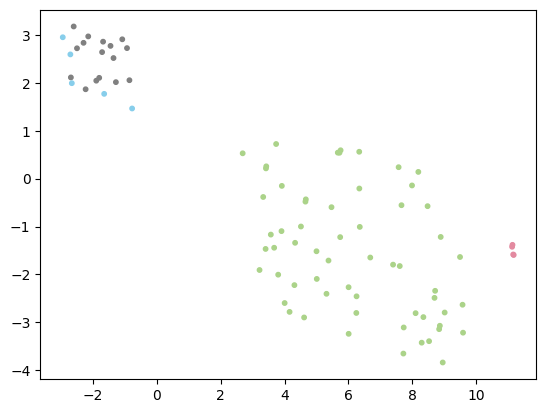

In [25]:
%matplotlib inline

X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label
X_embedded= TSNE(n_components=2, init='random').fit_transform(X_np)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1] , c=labelsNums[:len(X_embedded)], s=10, cmap= cc , alpha=1 )


In [26]:
def clsembed(snippet):
    inputs = tokenizer(snippet, padding='max_length', max_length=218, truncation=True, return_tensors='pt').to(device)
    #tokens = [self.tokenizer.cls_token] + inputs  + [self.tokenizer.sep_token]
    if(len(inputs)<512):
        with torch.no_grad():
            outs = model_codebert(**inputs)
        cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
        return cls
    else:
        print('longtest')
        i = 0
        part_vector =  []
        while ( i < len(inputs)-200) :
            #tokens = [self.tokenizer.cls_token] + inputs[i:i+250] +[self.tokenizer.sep_token]
            #tokens_ids= self.tokenizer.convert_tokens_to_ids(tokens)
            input_seg = [tokenizer.cls_token] + inputs[i:i+250] +[tokenizer.sep_token]
            with torch.no_grad():
                ots = model_codebert(**input_seg)
            cls = ots.last_hidden_state[:, 0, :].squeeze().detach()
            #cls = model_codebert(torch.tensor(inputs)[None,:])[1]
            #vector = cls[0].detach().numpy()
            parts.append(cls)
            i = i+100
        return parts

In [27]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
#labels_all = ['async wait','unordered collections','concurrency','time']
def get_class_rep(post_train_embed, post_train_label):
    # Move each tensor to CPU, convert to numpy, and collect in a list
    #post_train_embed = [x.cpu().numpy() for x in post_train_embed]
    # If you want to combine them into a single array (assuming they have the same shape)
    #post_train_embed = np.concatenate(post_train_embed, axis=0)
    representatives = [None] * 3
    for label in range(3):
        indices = np.where(np.atleast_1d(post_train_label) == label)[0]  # Get the indices as an array
        class_vectors = [post_train_embed[i] for i in indices]  # Access each index individually
        class_vectors = [x.cpu().numpy() for x in class_vectors]
        representatives[label] = np.mean(class_vectors, axis=0)
    return representatives

def calculate_normalized_distance(vec1, vec2):
    # Ensure vec1 and vec2 are numpy arrays
    if not isinstance(vec1, np.ndarray):
        vec1 = vec1.cpu().detach().numpy()
    if not isinstance(vec2, np.ndarray):
        vec2 = vec2.cpu().detach().numpy()
    
    # Normalize each vector to have unit length
    norm_vec1 = vec1 / np.linalg.norm(vec1)
    norm_vec2 = vec2 / np.linalg.norm(vec2)
    
    # Calculate Euclidean (L2) distance between the normalized vectors
    distance = np.linalg.norm(norm_vec1 - norm_vec2)
    
    return distance


In [28]:
int_to_label={
    0: 'NIO',
    1: 'NDOD',
    2: 'NOD',
    3: 'UD'
}


def get_closest_cluster(cluster_representatives, projected_vector):
    distances = [calculate_normalized_distance(rep, projected_vector) for rep in cluster_representatives]
    for i in range(len(distances)):
        distances[i] = np.mean(distances[i])
    closest_cluster_idx = np.argmin(distances)
    return int_to_label[closest_cluster_idx]

In [29]:
embed = post_train_embed
labels = post_train_label
def predict(input_vector):
    modified_vector = siamese_network(input_vector)
    representatives = get_class_rep(embed, labels)
    return get_closest_cluster(representatives, modified_vector)
    


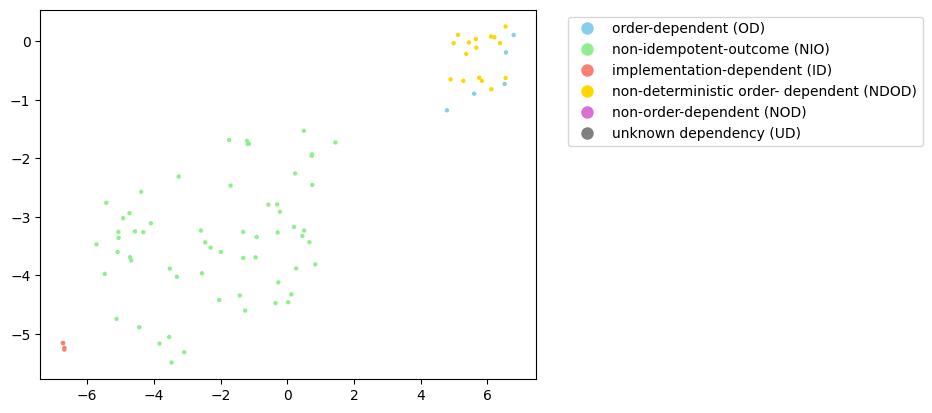

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed and post_train_label are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label

# Define vibrant colors for each category (same as used in the bar plot)
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Ensure labels are within the range of colors [0, 1, 2, 3, 4]
# Filter out invalid labels (-1) and keep only valid labels [0, 1, 2, 3, 4]
valid_indices = [i for i, label in enumerate(labelsNums) if label in [0, 1, 2, 3]]
X_np_filtered = X_np[valid_indices]
labelsNums_filtered = [labelsNums[i] for i in valid_indices]

# Dimensionality reduction with t-SNE
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np_filtered)

# Scatter plot
for i, label in enumerate(labelsNums_filtered):
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors[label], s=10, alpha=1, edgecolor='none', marker='o')

# Create legend with category labels
legend_labels = ['order-dependent (OD)', 'non-idempotent-outcome (NIO)', 'implementation-dependent (ID)', 'non-deterministic order- dependent (NDOD)', 'non-order-dependent (NOD)', 'unknown dependency (UD)']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors], labels=legend_labels,bbox_to_anchor=(1.05, 1), 
                    loc='upper left')

plt.show()


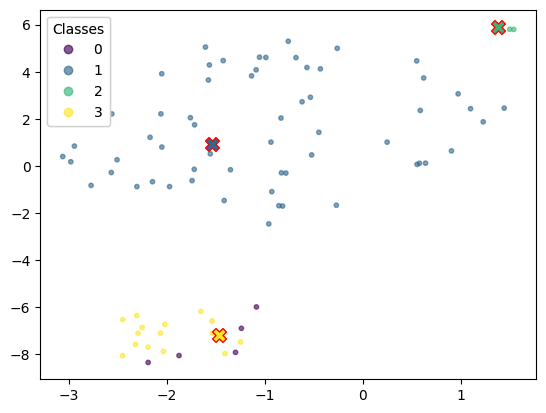

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed, post_train_label, and labelsNums are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np)

# Plot the data points
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labelsNums[:len(X_embedded)], s=10, cmap='viridis', alpha=0.6)

# Calculate class representatives
representatives = get_class_rep(post_train_embed, post_train_label)  # Make sure this function returns what you expect

# Get unique labels and their colors from the scatter plot
unique_labels = np.unique(labelsNums[:len(X_embedded)])
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# For each class representative, find the closest point and plot it
for i, rep in enumerate(representatives):
    if rep is not None:
        # Find the closest data point in the original space to this representative
        distances = np.linalg.norm(X_np - rep, axis=1)
        closest_point_index = np.argmin(distances)
        # Use the label of the closest data point to get the correct color
        label_of_closest = labelsNums[closest_point_index]
        color = scatter.cmap(scatter.norm(label_of_closest))
        plt.scatter(X_embedded[closest_point_index, 0], X_embedded[closest_point_index, 1], color=color, edgecolors='red', s=100, marker='X')

# You might want to adjust the legend to make sure it correctly represents your data
# plt.legend()
plt.show()


In [32]:
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# # Assuming 'X_embedded' is your t-SNE result and 'labelsNums' are your labels

# # Silhouette Score:
# # - Measures how similar an object is to its own cluster compared to other clusters.
# # - Range: -1 (incorrect clustering) to 1 (highly dense clustering). 
# #   A score close to 1 means that the clusters are well separated and clearly defined.
# silhouette_avg = silhouette_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Silhouette Score: {silhouette_avg}")

# # Davies-Bouldin Index:
# # - Evaluates the clustering quality by measuring the average 'similarity' between each cluster 
# #   and its most similar one. The similarity is based on a ratio of within-cluster distances to between-cluster distances.
# # - Range: 0 to +∞. Lower scores indicate better clustering quality.
# davies_bouldin = davies_bouldin_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Davies-Bouldin Index: {davies_bouldin}")

# # Calinski-Harabasz Index:
# # - Measures the cluster validity based on the ratio between the within-cluster dispersion and the between-cluster dispersion.
# # - Range: Higher values indicate better clustering quality, with no upper limit. Low values indicate clusters with high overlap.
# calinski_harabasz = calinski_harabasz_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Calinski-Harabasz Index: {calinski_harabasz}")


In [33]:
from sklearn.metrics import f1_score
 # Create reverse mapping

count = 0

# Assuming val_dataset is iterable and has 'anchor' and 'label' keys
predicted_labels = []
true_labels = []

for item in val_dataset:
    count += 1
    input_vector = item['anchor']  # Your input vector for prediction
    
    # Get predicted cluster/label
    predicted_label_str = predict(input_vector)
    
    # Ensure predicted_label is in the valid range
    if predicted_label_str in label_to_int:
        predicted_label = label_to_int[predicted_label_str]
        predicted_labels.append(predicted_label)
    else:
        print(f"Warning: Encountered unknown predicted label {predicted_label_str}")
        continue

    # True label
    true_label_int = int(item['label'])  # Assuming 'label' contains the true label as integer
    if true_label_int in int_to_label:
        true_labels.append(true_label_int)
    else:
        print(f"Warning: Encountered unknown true label {true_label_int}")
        continue

    print(count, "Predicted:", predicted_label, "True:", true_label_int)

# Filter out any invalid entries where predicted or true labels are missing
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label and predicted_labels[i] in int_to_label]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

print("Loop completed")

# Calculate F1 Score, ignoring unknown labels
f1 = f1_score(filtered_true_labels, filtered_predicted_labels, average='weighted', zero_division=0)  # Adjust 'average' as necessary
print(f"F1 Score: {f1}")


1 Predicted: 1 True: 1
2 Predicted: 0 True: 3
3 Predicted: 1 True: 1
4 Predicted: 0 True: 3
5 Predicted: 0 True: 1
6 Predicted: 2 True: 1
7 Predicted: 1 True: 1
8 Predicted: 1 True: 1
9 Predicted: 2 True: 2
10 Predicted: 1 True: 3
11 Predicted: 1 True: 1
12 Predicted: 0 True: 1
13 Predicted: 1 True: 1
14 Predicted: 1 True: 1
15 Predicted: 1 True: 1
16 Predicted: 0 True: 0
17 Predicted: 1 True: 1
18 Predicted: 1 True: 0
19 Predicted: 1 True: 1
20 Predicted: 1 True: 1
21 Predicted: 0 True: 3
22 Predicted: 1 True: 1
Loop completed
F1 Score: 0.6172936259143156


              precision    recall  f1-score   support

           0       0.17      0.50      0.25         2
           1       0.86      0.80      0.83        15
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         4

    accuracy                           0.64        22
   macro avg       0.38      0.57      0.44        22
weighted avg       0.62      0.64      0.62        22


 - Accuracy :  0.64
 - Precision :  0.62
 - Recall :  0.64
 - F1 score :  0.62
 - MCC :  0.35
 - AUC :  0.71


Performances by categories



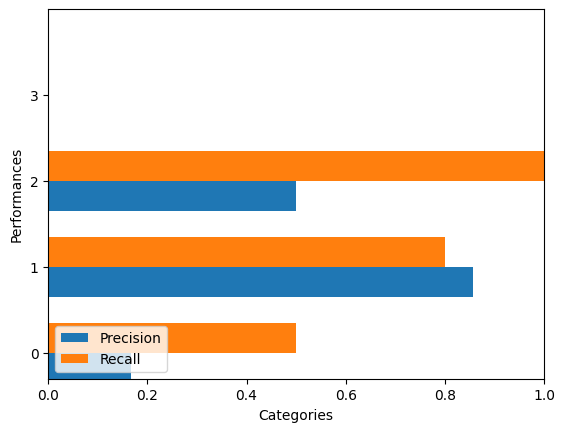



Confusion Matrix 


<AxesSubplot:>

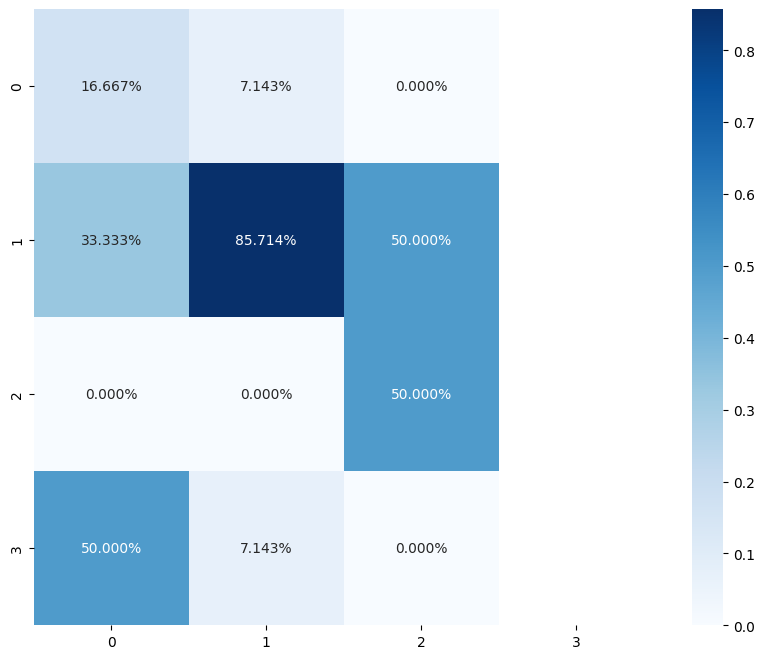

In [34]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

%matplotlib inline
warnings.filterwarnings("ignore")

def multiclass_roc_auc_score(truth, pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

# Assuming predicted_labels and true_labels are already defined
predicted = predicted_labels
labels = true_labels

# Filter out 'unknown' labels
valid_indices = [i for i, label in enumerate(labels) if label != 'unknown']
filtered_labels = [labels[i] for i in valid_indices]
filtered_predicted = [predicted[i] for i in valid_indices]

unique_labels = list(set(filtered_labels))
print(classification_report(filtered_labels, filtered_predicted))

print('\n - Accuracy : ', np.round(metrics.accuracy_score(filtered_labels, filtered_predicted), 2))
print(' - Precision : ', np.round(metrics.precision_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - Recall : ', np.round(metrics.recall_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - F1 score : ', np.round(metrics.f1_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - MCC : ', np.round(metrics.matthews_corrcoef(filtered_labels, filtered_predicted), 2))
print(' - AUC : ', np.round(multiclass_roc_auc_score(filtered_labels, filtered_predicted), 2))

print("\n\nPerformances by categories\n")

ind = np.arange(len(unique_labels)) 
width = 0.35
fig, ax = plt.subplots()
precision = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[0]
recall = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[1]
ax.barh(ind - width/2, precision, width, label='Precision')
ax.barh(ind + width/2, recall, width, label='Recall')
ax.set(yticks=ind, yticklabels=np.array(unique_labels), ylim=[2*width - 1, len(ind)])
plt.xlim(0, 1)
ax.legend(loc='lower left')
ax.set_ylabel("Performances")
ax.set_xlabel("Categories")
plt.show()

print("\n\nConfusion Matrix ")

mat = confusion_matrix(filtered_labels, filtered_predicted, labels=unique_labels)
df_cm = pd.DataFrame(mat, index=[i for i in unique_labels], columns=[i for i in unique_labels])
plt.figure(figsize=(10, 8))
sn.heatmap(df_cm / np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')


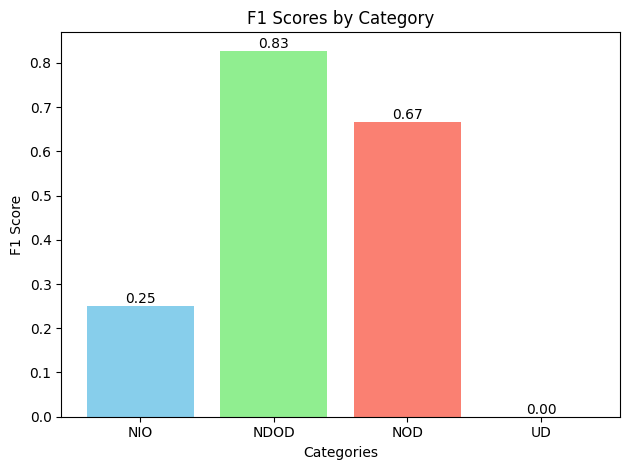

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
shortened_labels = {
    'OD': 'OD',
    'NIO': 'NIO',
    'ID': 'ID',
    'NDOD': 'NDOD',
    'NOD': 'NOD',
    'UD': 'UD'
}
# Assuming you have the predicted and true labels as per your previous code
# predicted_labels and true_labels should be lists of labels
# Filter out invalid labels from both true and predicted labels
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label.keys() and predicted_labels[i] in int_to_label.keys()]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

# Calculate F1 scores for each category
f1_scores = []
categories = list(int_to_label.keys())
for category in categories:
    true_bin = [1 if label == category else 0 for label in filtered_true_labels]
    pred_bin = [1 if label == category else 0 for label in filtered_predicted_labels]
    f1 = f1_score(true_bin, pred_bin, zero_division=0)
    f1_scores.append(f1)

# Define vibrant colors for each category
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Create bar plot with shortened category names and vibrant colors
shortened_categories = [shortened_labels[int_to_label[category]] for category in categories]
fig, ax = plt.subplots()
bars = ax.bar(shortened_categories, f1_scores, color=colors)

# Add F1 scores on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 0),  
                textcoords="offset points", ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Categories')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Category')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [36]:
# file_path = 'test_data_predictions.csv'

# # Load the compressed CSV file into a DataFrame
# df = pd.read_csv(file_path)

# # Extract the 'TrueLabel' and 'PredictedLabel' columns into separate variables
# labels_flaky = df['TrueLabel'].tolist()
# predicted_flaky = df['PredictedLabel'].tolist()

# print (classification_report(labels, predicted))

# print('\n - Accuracy : ' , np.round( metrics.accuracy_score(labels_flaky,  predicted_flaky) , 2))
# print(' - Precision : ' , np.round( metrics.precision_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - Recall : ' , np.round( metrics.recall_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - F1 score : ' , np.round( metrics.f1_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - MCC : ' , np.round( metrics.matthews_corrcoef(labels_flaky,  predicted_flaky) , 2))
# print(' - AUC : ' , np.round( multiclass_roc_auc_score(labels_flaky,  predicted_flaky),2) )

# print("\n\nPerfomnaces by categories\n")


# ind = np.arange(len(unique_labels)) 
# width = 0.35
# fig, ax = plt.subplots()
# precision = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[0]
# recall = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[1]
# ax.barh(ind - width/2, precision, width, label='Precision')
# ax.barh(ind + width/2, recall, width, label='Recall')
# ax.set(yticks=ind + width, yticklabels=np.array(unique_labels),
# ylim=[2*width - 1, len(ind)])
# plt.xlim(0,1)
# ax.legend(loc='upper right')
# ax.set_xlabel("Performances")
# ax.set_ylabel("Categories")
# plt.show()

# print("\n\nConfusion Matrix ")

# mat = confusion_matrix(labels_flaky,  predicted_flaky, labels=unique_labels)
# df_cm = pd.DataFrame(mat, index = [i for i in unique_labels], columns = [i for i in unique_labels])
# plt.figure(figsize = (10,8))
# sn.heatmap(df_cm/np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')

In [37]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import metrics

# precision_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[0]
# recall_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[1]
# # And assuming 'unique_labels' is defined as before

# ind = np.arange(len(unique_labels))  # the x locations for the groups
# width = 0.2  # the width of the bars

# fig, ax = plt.subplots(figsize=(14, 10))  # Adjust the figure size as needed

# # Using a set of contrasting, darker colors
# colors = ['blue', 'green', 'red', 'orange']

# # Plotting Precision and Recall for Your Model
# rects1 = ax.bar(ind - width*1.5, precision_our_model, width, label='Our Precision', color=colors[0])
# rects2 = ax.bar(ind - width/2, recall_our_model, width, label='Our Recall', color=colors[1])

# # Plotting Precision and Recall for Flaky Model
# rects3 = ax.bar(ind + width/2, precision_flaky, width, label='FlakyCat Precision', color=colors[2])
# rects4 = ax.bar(ind + width*1.5, recall_flaky, width, label='FlakyCat Recall', color=colors[3])

# # Add some text for labels, title, and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Class-wise Precision and Recall for Our Model vs. FlakyCat Model')
# ax.set_xticks(ind)
# ax.set_xticklabels(unique_labels, rotation=45, ha="right")  # Rotate for better label visibility
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside the figure

# # Optional: Adding scores above bars
# ax.bar_label(rects1, padding=3, fmt='%.2f')
# ax.bar_label(rects2, padding=3, fmt='%.2f')
# ax.bar_label(rects3, padding=3, fmt='%.2f')
# ax.bar_label(rects4, padding=3, fmt='%.2f')

# fig.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to make space for the legend outside

# plt.show()


In [38]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming metrics have been calculated and stored in variables for both models.
# # Example metric variables: accuracy, precision, recall, f1_score, mcc, auc for the original model
# # And similarly named variables with a '_flaky' suffix for the comparison model.

# metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC']
# your_model_metrics = [
#     np.round(metrics.accuracy_score(labels, predicted), 2),
#     np.round(metrics.precision_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.recall_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.f1_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels, predicted), 2),
#     np.round(multiclass_roc_auc_score(labels, predicted), 2)
# ]

# flaky_model_metrics = [
#     np.round(metrics.accuracy_score(labels_flaky, predicted_flaky), 2),
#     np.round(metrics.precision_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.recall_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.f1_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels_flaky, predicted_flaky), 2),
#     np.round(multiclass_roc_auc_score(labels_flaky, predicted_flaky), 2)
# ]

# x = np.arange(len(metrics_labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, your_model_metrics, width, label='Our Model')
# rects2 = ax.bar(x + width/2, flaky_model_metrics, width, label='FlakyCat Model')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Metrics Comparison between Our Model and FlakyCat Model')
# ax.set_xticks(x)
# ax.set_xticklabels(metrics_labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()


In [39]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# def extract_projections(siamese_network, dataloader):
#     projections = []
#     labels = []
#     for batch in dataloader:
#         label = batch["label"]
#         anchor = batch["anchor"]
#         projection = siamese_network(anchor)
        
#         projections.append(projection.cpu().detach().numpy())
#         labels.append(label.numpy())
#     projections = np.vstack(projections)
#     labels = np.hstack(labels)
#     return projections, labels

In [40]:
# projections, labels = extract_projections(siamese_network, train_dataloader)
# val_projections, val_labels = extract_projections(siamese_network, val_dataloader)

In [41]:
# print(len(projections), len(train_dataloader))

In [42]:
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(projections, labels)

# # Train SVM Classifier
# svm_classifier = SVC(kernel='linear', random_state=42)
# svm_classifier.fit(projections, labels)

In [43]:
# # Evaluate Random Forest Classifier
# rf_predictions = rf_classifier.predict(val_projections)
# rf_accuracy = accuracy_score(val_labels, rf_predictions)
# rf_f1 = f1_score(val_labels, rf_predictions, average='weighted')
# print(f"Random Forest Classifier Accuracy: {rf_accuracy}, F1: {rf_f1}")

# # Evaluate SVM Classifier
# svm_predictions = svm_classifier.predict(val_projections)
# svm_accuracy = accuracy_score(val_labels, svm_predictions)
# svm_f1 = f1_score(val_labels, svm_predictions, average='weighted')
# print(f"SVM Classifier Accuracy: {svm_accuracy}, F1:{svm_f1}")